In [1]:
import pickle
import time
import os
from sys import platform
import numpy as np
import matplotlib.pyplot as plt
from geant3_parser import Geant3DataFile
from geant3_parser import build_train_set


In [2]:
file_name = os.path.join('data', 'shower_geant3_new.dat')
data_file=Geant3DataFile(file_name,skip_lines=3)
input,true_e,sum_e=build_train_set(data_file,50000,add_real_xy=False,normalize=True)

Time open 2.649855613708496
Time split 0.5003631114959717


In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

2022-06-21 18:20:54.109137: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [4]:
#build autoencoder
input_layer=Input(shape=(123,))
encoder=Dense(64,activation='LeakyReLU')(input_layer)   #encoder
encoder=Dense(32,activation='LeakyReLU')(encoder)    #encoder
encoder=Dense(16,activation='LeakyReLU')(encoder)    #encoder
encoder=Dense(8,activation='LeakyReLU')(encoder)     #encoder
encoder=Dense(4,activation='LeakyReLU')(encoder)     #encoder
encoder=Dense(2,activation='LeakyReLU')(encoder)     #encoder
encoder=Dense(1,activation='sigmoid')(encoder)     #encoder
decoder=Dense(4,activation='LeakyReLU')(encoder)     #decoder
decoder=Dense(8,activation='LeakyReLU')(decoder)     #decoder
decoder=Dense(16,activation='LeakyReLU')(decoder)    #decoder
decoder=Dense(32,activation='LeakyReLU')(decoder)    #decoder
decoder=Dense(64,activation='LeakyReLU')(decoder)    #decoder
decoder=Dense(123,activation='tanh')(decoder) #decoder
autoencoder=Model(input_layer,decoder)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','mse','mae'])   #compile
autoencoder.summary()                                                                           #summary    #train
history=autoencoder.fit(input,input,epochs=20,batch_size=121,validation_split=0.2)                                                   #train  #validation_split=0.2
autoencoder.save('trained_models/autoencoder.hd5')                                                                 #save    #save



2022-06-21 18:20:59.128128: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-06-21 18:20:59.231709: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-06-21 18:20:59.231788: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro P1000 computeCapability: 6.1
coreClock: 1.5185GHz coreCount: 4 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 89.53GiB/s
2022-06-21 18:20:59.231881: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-06-21 18:20:59.247681: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-06-21 18:20:59.247828: I tensorflow/stream_executor/platform/d

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 123)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                7936      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10    

2022-06-21 18:21:02.432184: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-21 18:21:02.432890: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2904005000 Hz


Epoch 1/20


2022-06-21 18:21:03.704203: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-06-21 18:21:06.292238: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


331/331 [==============================] - 12s 23ms/step - loss: 0.2585 - accuracy: 0.7061 - mse: 0.0084 - mae: 0.0575 - val_loss: 0.2469 - val_accuracy: 0.9780 - val_mse: 0.0074 - val_mae: 0.0580
Epoch 2/20
331/331 [==============================] - 8s 24ms/step - loss: 0.2463 - accuracy: 0.9775 - mse: 0.0074 - mae: 0.0583 - val_loss: 0.2464 - val_accuracy: 0.9780 - val_mse: 0.0075 - val_mae: 0.0591
Epoch 3/20
331/331 [==============================] - 7s 22ms/step - loss: 0.2462 - accuracy: 0.9775 - mse: 0.0075 - mae: 0.0601 - val_loss: 0.2462 - val_accuracy: 0.9780 - val_mse: 0.0075 - val_mae: 0.0611
Epoch 4/20
331/331 [==============================] - 7s 21ms/step - loss: 0.2462 - accuracy: 0.9775 - mse: 0.0076 - mae: 0.0624 - val_loss: 0.2461 - val_accuracy: 0.9780 - val_mse: 0.0077 - val_mae: 0.0632
Epoch 5/20
331/331 [==============================] - 7s 20ms/step - loss: 0.2459 - accuracy: 0.9775 - mse: 0.0076 - mae: 0.0628 - val_loss: 0.2462 - val_accuracy: 0.9780 - val_mse: 

2022-06-21 18:23:26.046186: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: trained_models/autoencoder.hd5/assets


INFO:tensorflow:Assets written to: trained_models/autoencoder.hd5/assets


In [5]:
print(history.history)

{'loss': [0.25847822427749634, 0.2463153600692749, 0.2462007850408554, 0.24620048701763153, 0.24586693942546844, 0.2465873807668686, 0.2408761978149414, 0.23918472230434418, 0.2386782020330429, 0.2386040985584259, 0.23861569166183472, 0.23861537873744965, 0.23870410025119781, 0.23854601383209229, 0.22578075528144836, 0.2244921326637268, 0.22411467134952545, 0.22405458986759186, 0.22405698895454407, 0.224031463265419], 'accuracy': [0.7061499953269958, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665], 'mse': [0.008411284536123276, 0.007414679508656263, 0.007476382423192263, 0.007634675595909357, 0.007582082413136959, 0.008453077636659145, 0.00882110558450222, 0.0

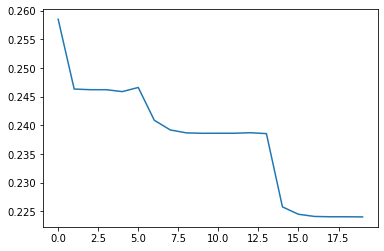

In [6]:
plt.plot(history.history['loss'])

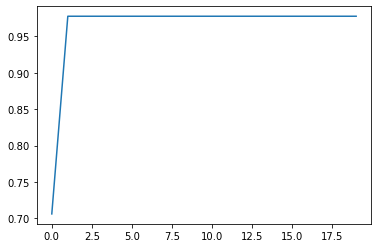

In [7]:
plt.plot(history.history['accuracy'])

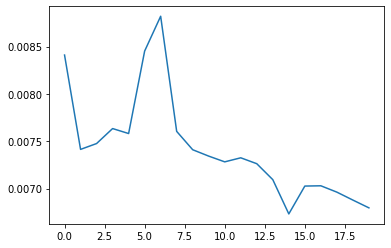

In [8]:
plt.plot(history.history['mse'])

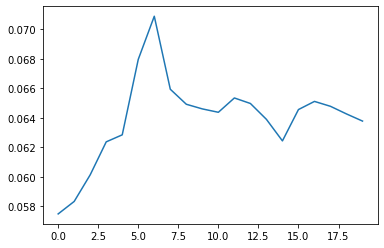

In [9]:
plt.plot(history.history['mae'])